In [1]:
#Analytics2(LogisticRegression)
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.dropna()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
data=df.dropna()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

In [10]:
data=data.replace('Female',1)
data=data.replace('Male',0)

In [11]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [12]:
x=data.iloc[:,:-1].values

In [13]:
y=data.iloc[:,-1].values

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [23]:
lor=LogisticRegression()
lor.fit(x_train,y_train)

LogisticRegression()

In [25]:
y_pred= lor.predict(x_test)
print(y_pred)

[1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


In [26]:
cm=confusion_matrix(y_test,y_pred)
TN,FP,FN,TP=cm.ravel()
pre_scr=precision_score(y_test,y_pred)
acc_scr=accuracy_score(y_test,y_pred)
error_score=1-acc_scr
rec_scr=recall_score(y_test,y_pred)

In [27]:
print(f'{pre_scr:.2f}')

1.00


In [28]:
print(f'{acc_scr:.2f}')

0.77


In [29]:
print(f'{error_score:.2f}')

0.23


In [31]:
print(f'{rec_scr:.2f}')

0.39


<AxesSubplot:>

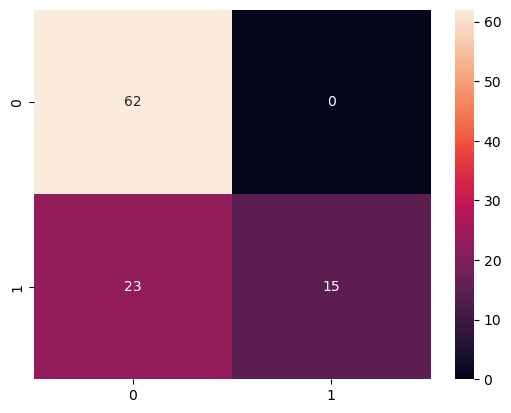

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm,annot=True)